In [5]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import numpy as np

## Load datasets

In [9]:
balance = pd.read_csv('datasets/main/data_balance.csv', delimiter=',')
check = pd.read_csv('datasets/main/data_check.csv', delimiter=',')
data_query = pd.read_csv('datasets/main/dataquery.csv', delimiter=',')
save_invoice = pd.read_csv('datasets/main/saveinvoice.csv', delimiter=',')
sync = pd.read_csv('datasets/main/data_sync.csv', delimiter=',')
z_list = pd.read_csv('datasets/main/zlist.csv', delimiter=',')



## Preparing datasets

In [8]:
from data_prep.prepare import clean_data

balance = clean_data.resample(balance)
check = clean_data.resample(check)
data_query = clean_data.resample(data_query)
save_invoice = clean_data.resample(save_invoice)
sync = clean_data.resample(sync)
z_list = clean_data.resample(z_list)

balance.to_csv('datasets/main/data_balance.csv')
check.to_csv('datasets/main/data_check.csv')
data_query.to_csv('datasets/main/dataquery.csv')
save_invoice.to_csv('datasets/main/saveinvoice.csv')
sync.to_csv('datasets/main/data_sync.csv')
z_list.to_csv('datasets/main/zlist.csv')








## Z-score Sync

1366


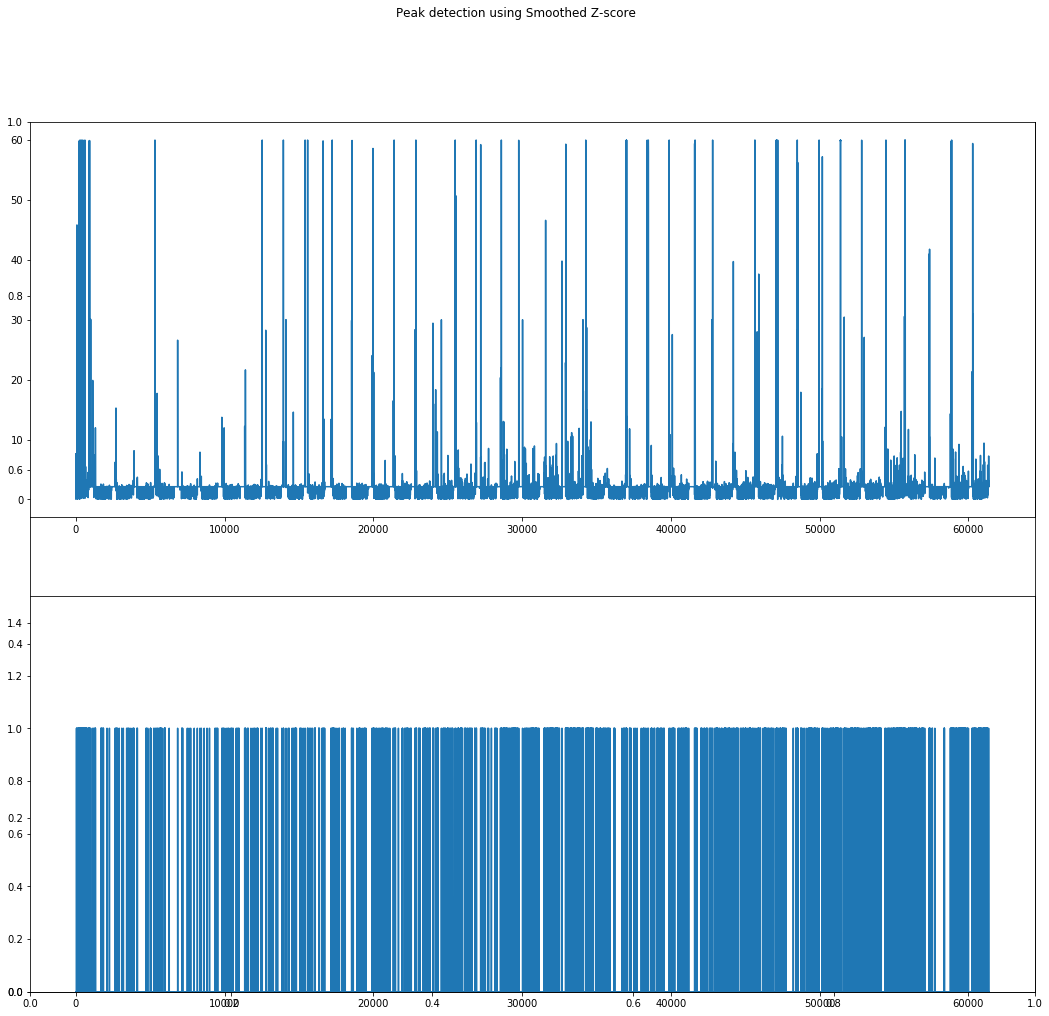

In [259]:
from detection_model.get_signals import get_signals
from plot_functions.plots import plots


z_score_arr = np.array(z_list['stime'])
z_score_zlist = get_signals.detect_spikes(z_score_arr, lag=30, threshold=2, influence=0)

plots.plot_z_score(z_score_arr, z_score_zlist)
zlist_results = pd.DataFrame(z_score_zlist)

print(len(zlist_results[zlist_results['signals']>0]))


zlist_results.to_csv('zlist_results.csv')

948


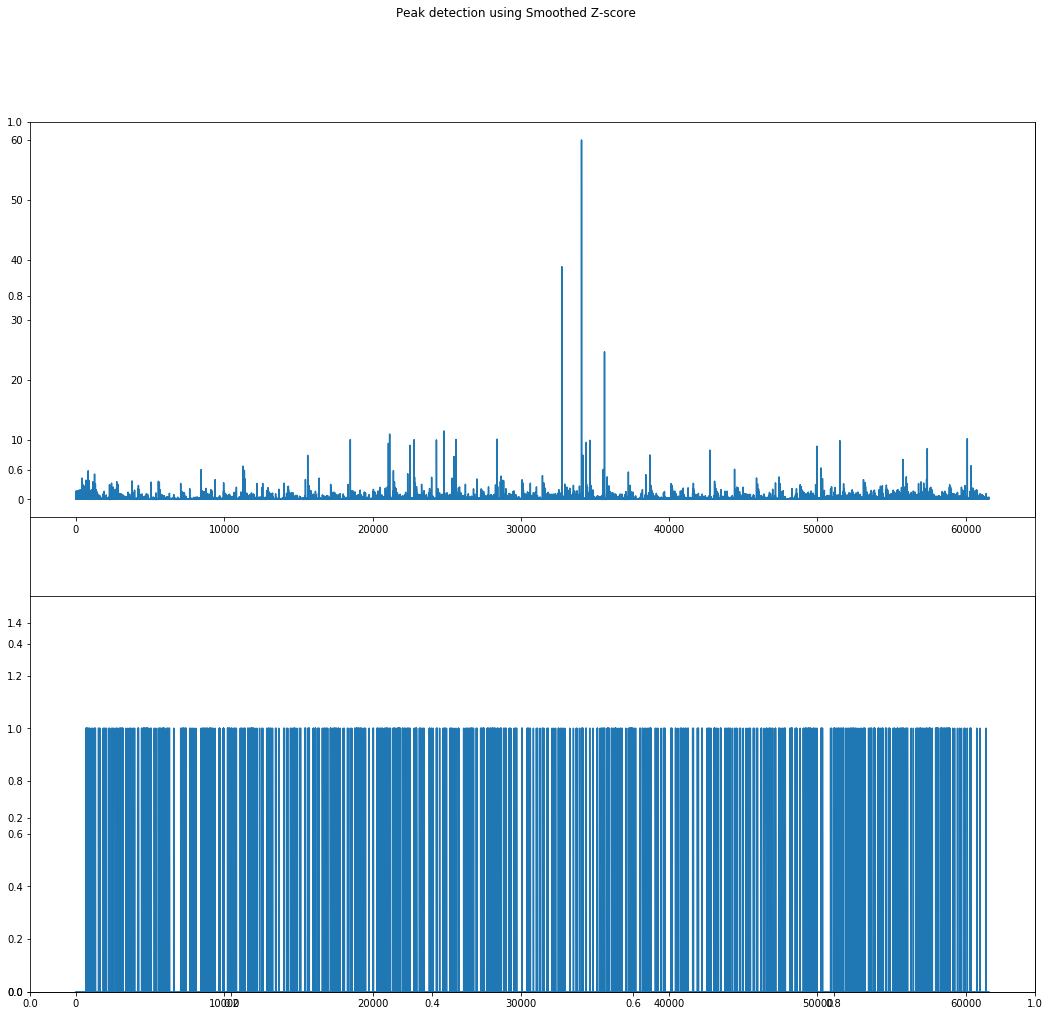

In [208]:
from detection_model.get_signals import get_signals
from plot_functions.plots import plots
sync_arr = np.array(sync['stime'])
z_score_sync = get_signals.detect_spikes(sync_arr, lag=30, threshold=8, influence=0.3)

plots.plot_z_score(sync_arr, z_score_sync)
sync_results = pd.DataFrame(z_score_sync)
print(len(sync_results[sync_results['signals']>0]))

sync_results.to_csv('sync_results.csv')


537


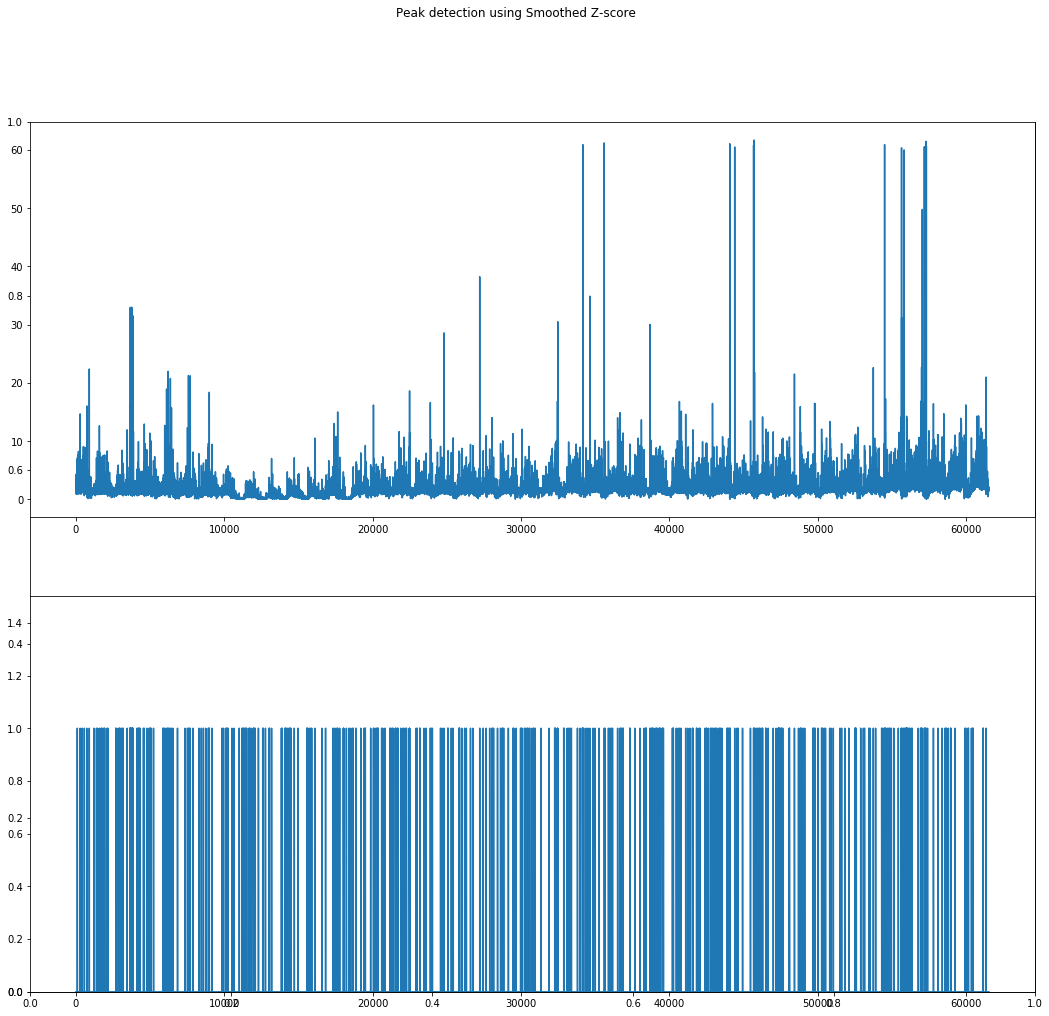

In [66]:

sinvoice_arr = np.array(save_invoice['stime'])
z_score_sinvoice = get_signals.detect_spikes(sinvoice_arr, lag=30, threshold=8, influence=0.3)

plots.plot_z_score(sinvoice_arr, z_score_sinvoice)
sinvoice_results = pd.DataFrame(z_score_sinvoice)

print(len(sinvoice_results[sinvoice_results['signals']>0]))

sinvoice_results.to_csv('sinvoice_results.csv')

549


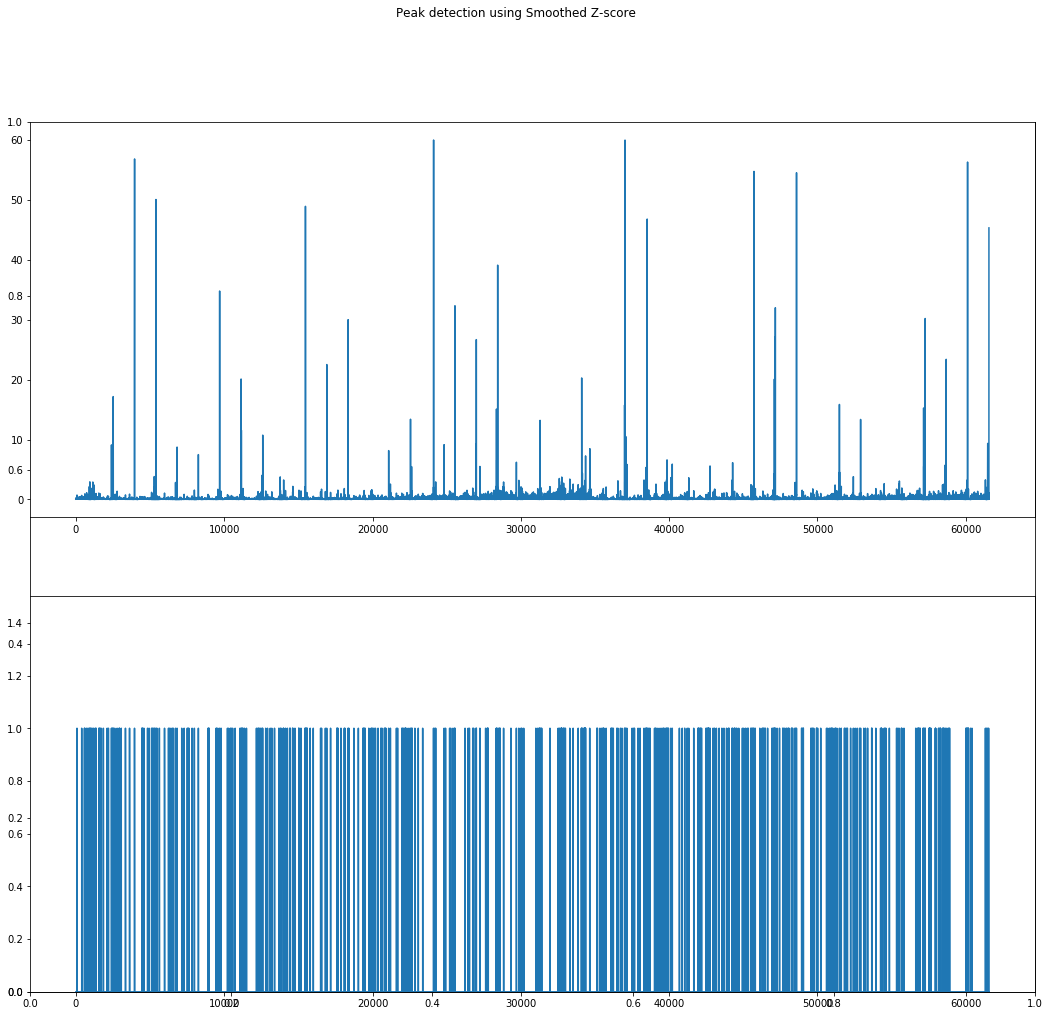

In [212]:

data_query_arr = np.array(data_query['stime'])
z_score_data_query = get_signals.detect_spikes(data_query_arr, lag=30, threshold=10, influence=0.3)

plots.plot_z_score(data_query_arr, z_score_data_query)
data_query_results = pd.DataFrame(z_score_data_query)
print(len(data_query_results[data_query_results['signals']>0]))

data_query_results.to_csv('data_query_results.csv')

824


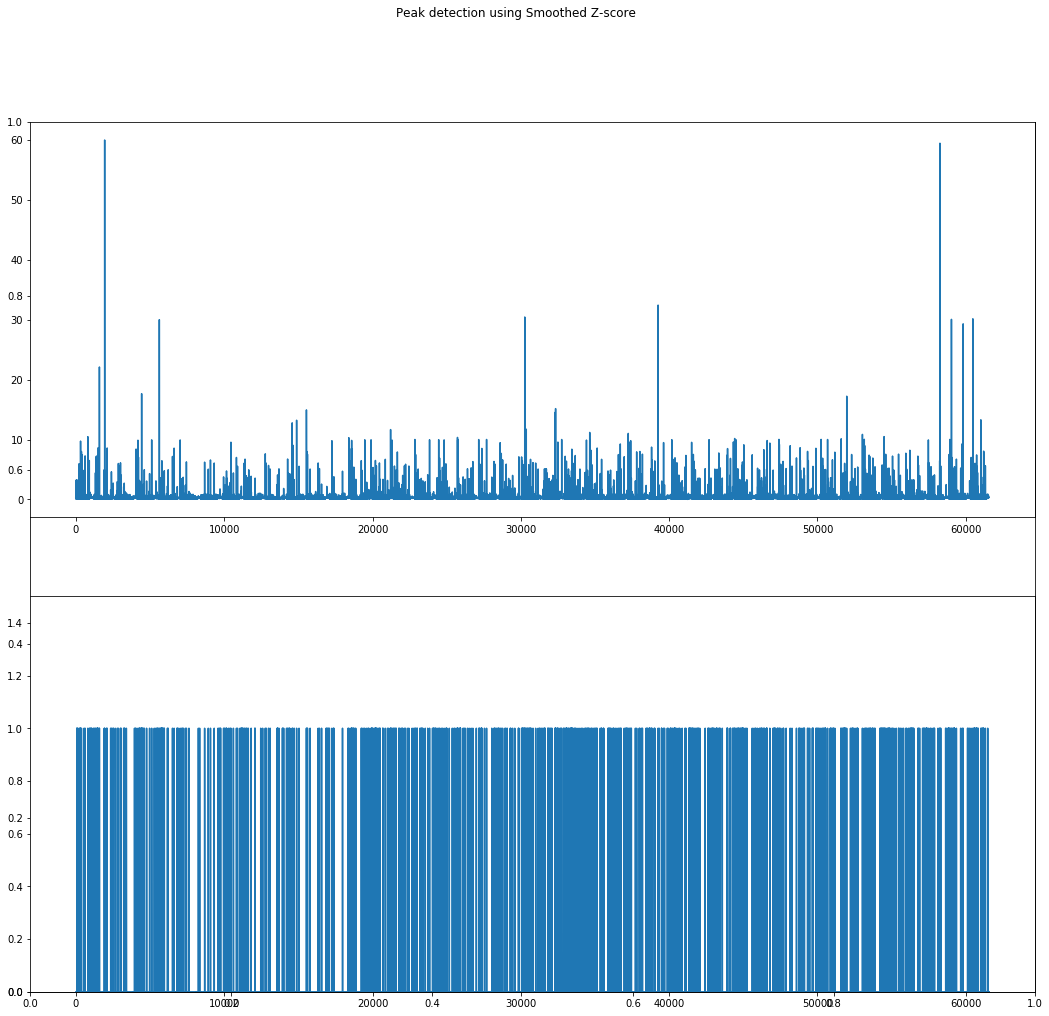

In [217]:

check_arr = np.array(check['stime'])
z_score_check = get_signals.detect_spikes(check_arr, lag=30, threshold=10, influence=0.3)

plots.plot_z_score(check_arr, z_score_check)
check_results = pd.DataFrame(z_score_check)
print(len(check_results[check_results['signals']>0]))

check_results.to_csv('check_results.csv')

190


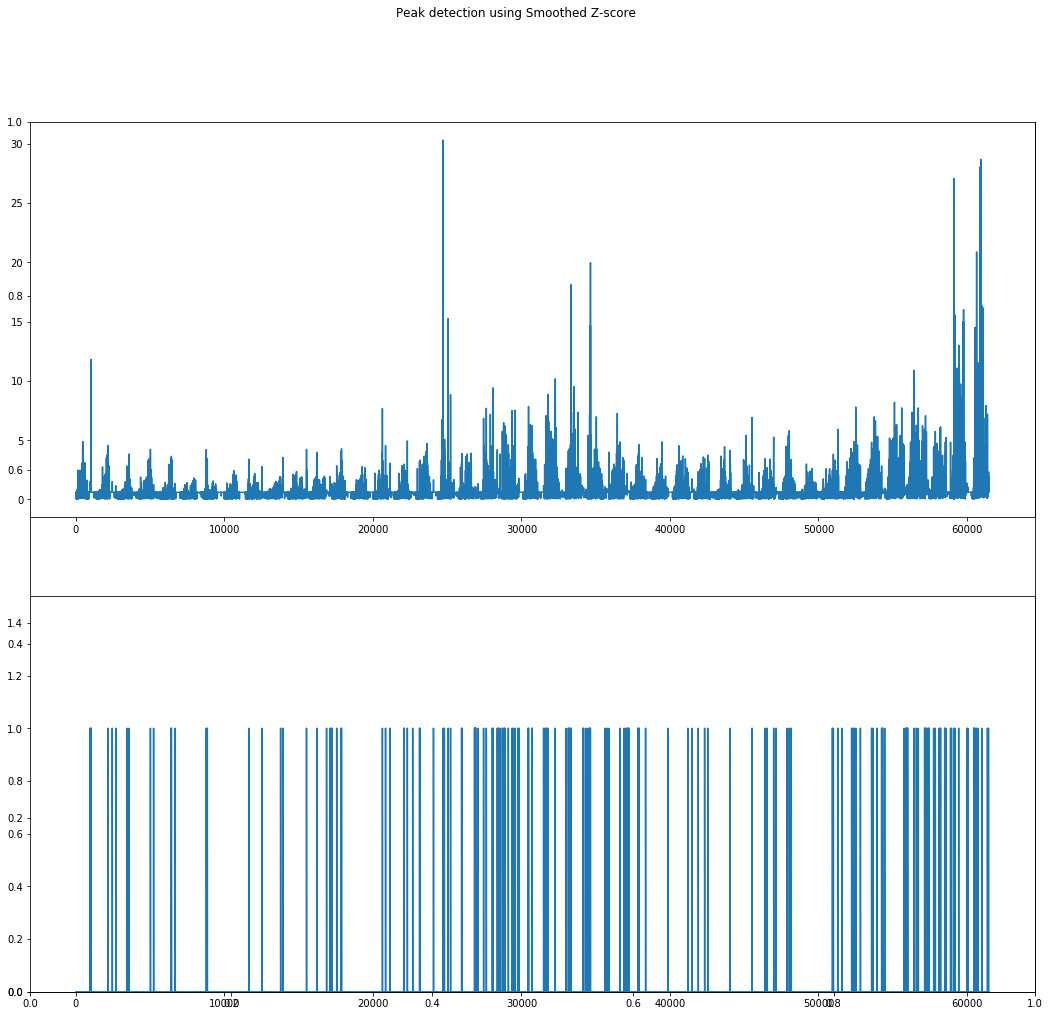

In [246]:

balance_arr = np.array(balance['stime'])
z_score_balance = get_signals.detect_spikes(balance_arr, lag=30, threshold=10, influence=0.3)

plots.plot_z_score(balance_arr, z_score_balance)
balance_results = pd.DataFrame(z_score_balance)
print(len(balance_results[balance_results['signals']>0]))


balance_results.to_csv('balance_results.csv')

## Get Amplitude

In [251]:
z_list.shape, save_invoice.shape, check.shape, balance.shape,data_query.shape, sync.shape

((61390, 9), (61551, 8), (61559, 9), (61480, 9), (61560, 8), (61559, 8))

In [255]:
zr = pd.read_csv('datasets/z_score_results/zlist_results.csv')
sinvoicer = pd.read_csv('datasets/z_score_results/sinvoice_results.csv')
syncr = pd.read_csv('datasets/z_score_results/sync_results.csv')
dataqr = pd.read_csv('datasets/z_score_results/data_query_results.csv')
checkr = pd.read_csv('datasets/z_score_results/check_results.csv')
balancer = pd.read_csv('datasets/z_score_results/balance_results.csv')


In [256]:
col_names=['z_list', 'save_invoice', 'check', 'balance', 'data_query', 'sync']
results = pd.DataFrame(index=np.arange(61000))
i = 0

for df,res in zip((z_list, save_invoice, check, balance,data_query, sync),(zr,sinvoicer, checkr,balancer,dataqr,syncr)):
    res = res['signals'][:61000].values
    df = df['stime'][:61000].values
    results[col_names[i]] = res*df
    i += 1

                  
    

In [257]:
"""

final_zlist = pd.DataFrame(results['z_list'])
final_zlist.to_csv('final_zlist.csv')
final_sinvoice = pd.DataFrame(results['save_invoice'])
final_sinvoice.to_csv('final_sinvoice.csv')
final_check = pd.DataFrame(results['check'])
final_check.to_csv('final_check.csv')
final_balance = pd.DataFrame(results['balance'])
final_balance.to_csv('final_balance.csv')
final_dquery = pd.DataFrame(results['data_query'])
final_dquery.to_csv('final_dquery.csv')
final_sync = pd.DataFrame(results['sync'])
final_sync.to_csv('final_sync.csv')
"""